In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [84]:
dataDir='/home/gmayank43/cs230/datasets/'
dataType='train2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [85]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=11.77s)
creating index...
index created!


In [86]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
print(cats[0])
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

{'supercategory': 'person', 'id': 1, 'name': 'person'}
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen person outdoor appliance indoor animal furniture accessory electronic food sports vehicle


In [87]:
# get all images containing given categories, select one at random
cats = coco.loadCats(coco.getCatIds())
outdoorCats = []
for category in cats:
    if category['supercategory'] == 'outdoor' or category['supercategory'] == 'vehicle':
        outdoorCats.append(category['name'])

print('Outdoor Categories are', outdoorCats)

Outdoor Categories are ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench']


In [88]:
outdoorCategoryIds = []
outdoorImageIds = []
for cat in outdoorCats:
    catIds = coco.getCatIds(catNms=[cat]);
    outdoorCategoryIds.extend(catIds)
    outdoorImageIds.extend(coco.getImgIds(catIds=catIds))
    
print('Outdoor Category Ids', outdoorCategoryIds)
print('Number of images in Outdoor Category', len(outdoorImageIds))
# imgIds = coco.getImgIds(imgIds = [440329])
img = coco.loadImgs(outdoorImageIds[np.random.randint(20,len(outdoorImageIds))])[0]

Outdoor Category Ids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]
Number of images in Outdoor Category 36889


{'license': 5, 'file_name': 'COCO_train2014_000000459234.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000459234.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-19 00:37:19', 'flickr_url': 'http://farm8.staticflickr.com/7418/9589702550_469a14f087_z.jpg', 'id': 459234}


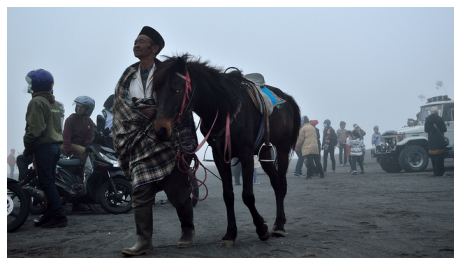

In [89]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
print(img)
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

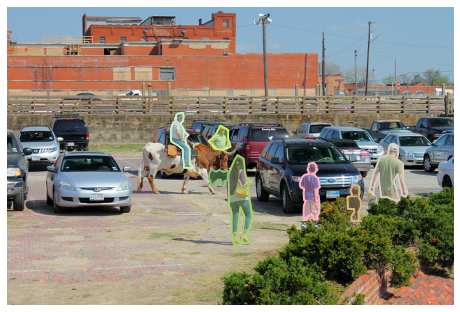

In [17]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [20]:
# initialize COCO api for person keypoints annotations
annFile = '/home/gmayank43/cs230/datasets/annotations/person_keypoints_{}.json'.format(dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=3.14s)
creating index...
index created!


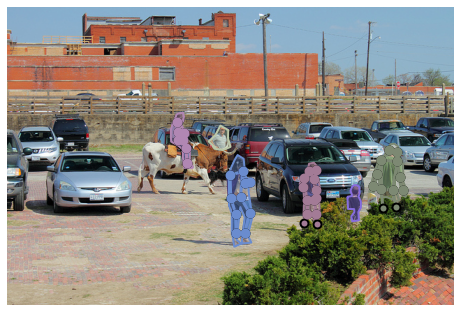

In [21]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [79]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


A man walking with a small horse on a dirt ground while people stand next to their motorcycles.
A man in plaid shawl walking with a black horse.
a man walks next to a horse near some other people.
A man leads a horse past a group of motorcyclists.
a man walking down a road with a horse beside him 


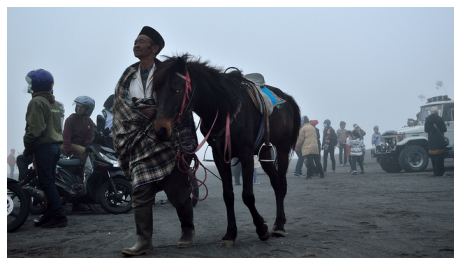

In [90]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()